#***Homework3: Recursion***


**I. Lập và giải công thức đệ quy xác định độ phức tạp thuật toán**


***1.***

*a)* $x(n)= \begin{cases}2x(n−3)\text{ for }n>1  \\ x(1)=1\end{cases} $

$x(n) = 2x(n-3) = 2(2x(n-6)) = 2^2x(n-6) = ... = 2^kx(n - 3k) = 2^{[n/3]}x(n-3[n/3]) $

Vì $X(1) = 1 ≈ X(0) ≈ X(2) \to  O(2^{[n/3]}) \to O(2^n)$
    
*b)* $x(n)= \begin{cases}x(n−2)−2\text{ for }n>1  \\ x(1)=0\end{cases} $

$x(n) = x(n-2) - 2 = x(n-4) - 2 - 2 = x(n-6) - 3 \times 2 = ... = x(n-2k)- k \times 2$ 
 Vì $X(1) = 1 ≈ X(0) \to  O(-2 \times[n/2]) \to O(n)$

*c)* $x(n)= \begin{cases}2x(n−2)−n \text{ for }n>0\\ x(0)=0\end{cases} $

$x(n) = 2x(n-2) - n = 2(2x(n-4) - n) - n = 2^2x(n-4) - (n+2n) = n^3x(n-6) -(n+2n+3n) = ... = 2^k \times x(n-2k) - (2^{k} -1) \times n = 2^{[n/2]}x(n - 2[n/2]) - ( 2^{[n/2]} -1)\times n $
 Vì $X(0) = 0 ≈ X(1) \to  O(2^{[n/2]} \times n) \to O(2^n \times n)$



 2.

Thuật toán F(n) sử dụng phương pháp đệ quy để tính giá trị nhị phân của số thập phân n. Các bước của thuật toán như sau:

- Nếu n = 0, trả về 0
- Nếu n = 1, trả về 1

- Gọi đệ quy F(n/2) để tính giá trị nhị phân của n/2

  - Nếu n chẵn, trả về kết quả của F(n/2) + str(F(0))
 - Nếu n lẻ, trả về kết quả của F(n/2) + str(F(1))

$F(n)= \begin{cases}0 \text{ if } n= 0 \\ 1 \text{ if }  n = 1 \\ F(n-1) +str(n\%2)\end{cases} $

**II. Lập trình đệ quy**



In [1]:
import math
import time
import matplotlib.pyplot as plt
import random
import numpy as np


In [2]:
def countTime(func, arr):
    start = time.time()
    func(arr)
    end = time.time()
    return end - start


1. In biểu diễn nhị phân của số nguyên

In [3]:
def representBinary(x):
    if x == 0:
        return '0'
    elif x == 1:
        return '1'
    else:
        return representBinary(x//2) + str(x%2)

In [4]:
def printRepresentation():
    numbers = []
    times = []
    for i in range(1,10000):
        numbers.append(i)
        time = countTime(representBinary, i)
        times.append(time)
    plt.plot(numbers, times )
    plt.xlabel('n')
    plt.ylabel('Thời gian(s)')
    plt.title("Represention Binary Number")
    plt.show()

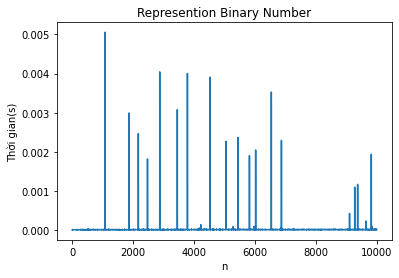

In [5]:
printRepresentation()

2. Phân tích số nguyên thành tích các thừa số nguyên tố

In [6]:
def analysis_prime_number(n, i = 2):
    if n < i:
      if n > 1:
        return [n]
      else:
        return []
    else:
      if n % i == 0:
        count = 0
        while n%i == 0:
            n //= i
            count += 1
        return [i]*count + analysis_prime_number(n , i + 1)
      else:
        return analysis_prime_number(n, i + 1)

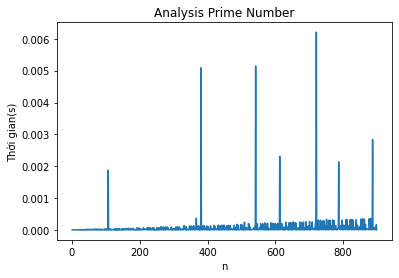

In [7]:
def printAnalysisPrimeNumber():
    numbers = []
    times = []
    for i in range(1,900):
        numbers.append(i)
        time = countTime(analysis_prime_number, i)
        times.append(time)
    plt.plot(numbers, times )
    plt.xlabel('n')
    plt.ylabel('Thời gian(s)')
    plt.title("Analysis Prime Number")
    plt.show()

printAnalysisPrimeNumber()

In [8]:
def findFibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return findFibonacci(n-1) + findFibonacci(n-2)

In [9]:
def printFindFibonacci():
    numbers = []
    times = []
    for i in range(1,40):
        numbers.append(i)
        time = countTime(findFibonacci, i)
        times.append(time)
    plt.plot(numbers, times)
    plt.xlabel('n')
    plt.ylabel('Thời gian(s)')
    plt.title('Find Fibonacci')
    plt.show()

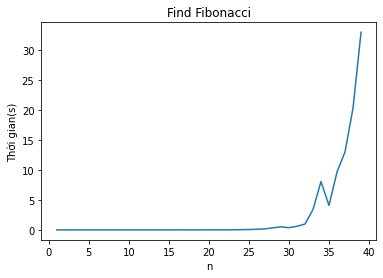

In [10]:
printFindFibonacci()

4. Bài toán tháp Hà Nội


In [11]:
def towerOfHanoi(n,from_rod='a', to_rod='b', aux_rod='C'):
    if n == 1:
        return 1
    else:
        return towerOfHanoi(n-1,from_rod,aux_rod,to_rod) + towerOfHanoi(n-1,to_rod,from_rod,aux_rod) + 1

In [12]:
def printTowerOfHanoi():
    numbers = []
    times = []
    for i in range(1,30):
        numbers.append(i)
        time = countTime(towerOfHanoi, i)
        times.append(time)
    plt.plot(numbers, times)
    plt.xlabel('n')
    plt.ylabel('Thời gian(s)')
    plt.title('Tower Of Hanoi')
    plt.show()

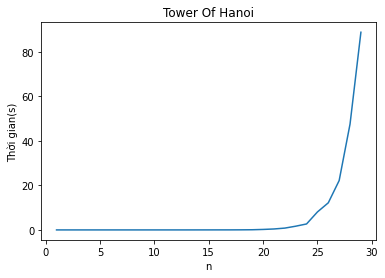

In [13]:
printTowerOfHanoi()

**III. Đặt bài toán, thiết kế, phân tích và triển khai thuật toán**


**Bài toán xếp balo:** Có $n$ đồ vật, mỗi vật có trọng lượng $P_i$ và giá trị $V_i(i=1..n)$. Có
một chiếc balo có thể chứa trọng lượng tối đa là $M$. Hãy xác định tổng giá trị lớn nhất
của các vật có thể đưa vào balo. Chỉ ra một cách cho các vật vào balo.


Xây dựng thuật toán:

- Tạo bảng DP để lưu giá trị của các trường hợp
- Dùng vòng lặp để duyệt qua từng món hàng:
  - Vòng lặp để duyệt qua khối lượng từng món hàng
   - Gọi $f(i,j)$ là tổng giá trị lớn nhất của cái túi khi xét từ vật 1 đến vật $i$ trong túi là túi có giới hạn là j 

    - Nếu i hoặc $M \le 0 $ thì không có cách xếp nào $\to f(0,j) = 0, f(i,0 ) = 0 $
    - Nếu $V_i > M$ thì bỏ qua vật $n \to f(i,M) =f(i-1,M) $ 
    - Nếu $V_i \le M$ ta có 2 trường hợp:
      - Nếu không lấy $i \to f(i,M) =f(i-1,M) $ 
      - Nếu lấy $i\to f(i,M) = V_i +  f(i-1,M - P_i)$
 
  - $\to \begin{cases}
f(0,j) = 0\\
f(i,0) = 0\\
f(i,j) = max(f(i-1,j),V_i +  f(i-1,M - P_i) )
\end{cases}$


Ta có:

$f(i,j) = max(f(i-1,j),V_i +  f(i-1,M - P_i)) \le max(2f(i-1,j))$

$\to f(i,j) \le max(2(max(2f(i-2,j))$

$\to f(i,j) ≈ O(1) $ 
vì các giá trị của $f(i-1,j)$ đã được tính là lưu lại

Độ phức tạp của thuật toán xếp balo sẽ phụ thuộc vào số lượng của các vật và giới hạn của túi  $\to O(nM)$ trong đó n là số lượng vật, M là giới hạn của túi.

*Thực hiện thuật toán:*




In [14]:
def proceduce_bag(p,v,m):
    n = len(p)
    dp = [[0 for i in range(m+1)] for j in range(n+1)]
    chosen = [[False for _ in range(m+1)] for _ in range(n+1)]
    for i in range(1,n+1):
        for j in range(1,m+1):
            if p[i-1] <=  j:
                if p[i-1] + dp[i-1][j-p[i-1]] > dp[i-1][j]:
                    dp[i][j] = v[i-1] + dp[i-1][j-p[i-1]]
                    chosen[i][j] = True
                else:
                    dp[i][j] = dp[i-1][j]
            else:
                dp[i][j] = dp[i-1][j]
    i, j = n, M
    chosen_items = []
    while i > 0 and j > 0:
        if chosen[i][j]:
            chosen_items.append(i)
            j -= p[i-1]
        i -= 1
    chosen_items.reverse()
    return dp[n][M], chosen_items   


In [15]:
M = 10
P = [6,3,5,4,6]
W = [2,2,6,5,4]
a,b = proceduce_bag(P,W,M)
print(a,b)

11 [3, 4]
